In [ ]:
# e stands for economic and s stands for secuity
# c stands for classification and f stands for forecast
path = "../../../data/"
classification_datasets = [
    "c_e_class_financial_distress.csv",
    "c_s_class_ny_arrests.csv",
]
forcasting_datasets = [
    "f_e_forecast_gdp_europe.csv",
    "f_s_forecast_ny_arrests.csv",
]



Dataset Shape: (58, 12)


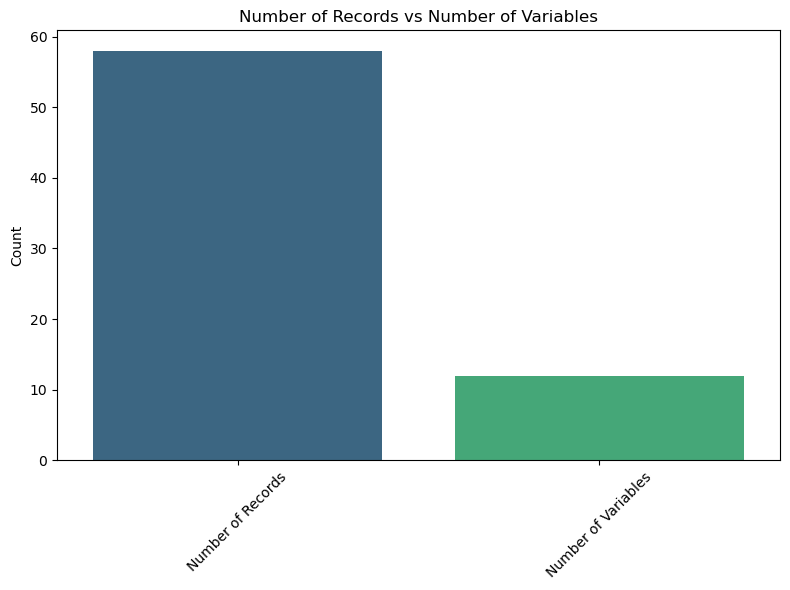

Saved plot: images/stroke_records_variables.png


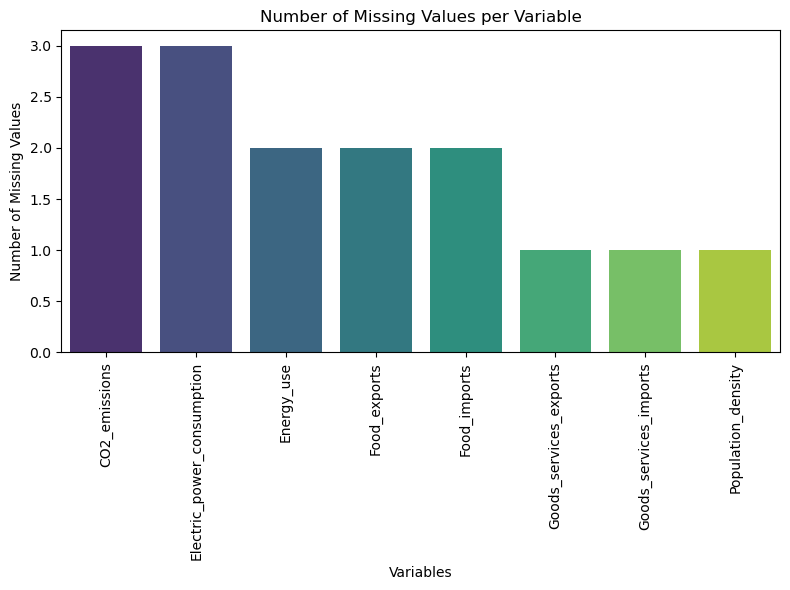

Saved plot: images/stroke_mv.png

Variable Types:
{'numeric': ['Year', 'Birth_rate', 'CO2_emissions', 'Death_rate', 'Electric_power_consumption', 'Energy_use', 'Food_exports', 'Food_imports', 'Goods_services_exports', 'Goods_services_imports', 'Population_density', 'GDP'], 'binary': [], 'date': [], 'symbolic': []}


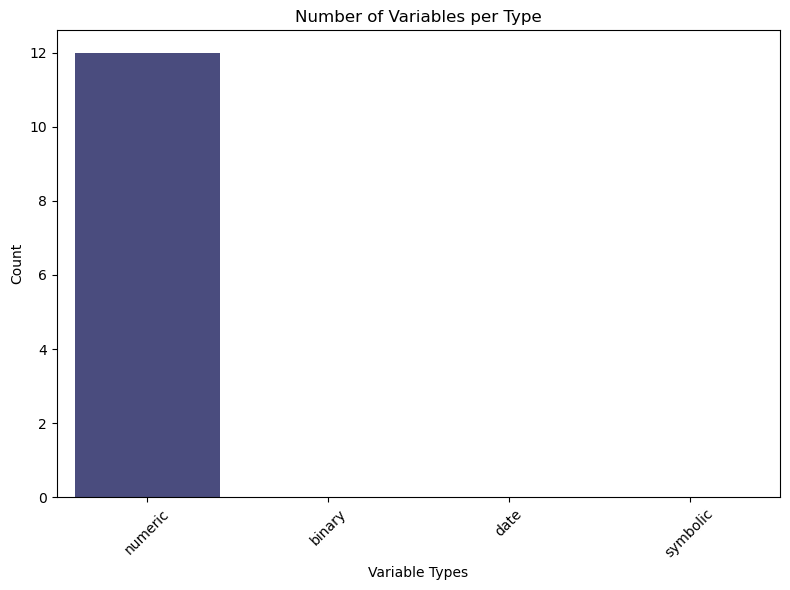

Saved plot: images/stroke_variable_types.png

No symbolic variables to convert.

Updated Data Types:
Year                            int64
Birth_rate                    float64
CO2_emissions                 float64
Death_rate                    float64
Electric_power_consumption    float64
Energy_use                    float64
Food_exports                  float64
Food_imports                  float64
Goods_services_exports        float64
Goods_services_imports        float64
Population_density            float64
GDP                           float64
dtype: object

Summary:
- Total Records: 58
- Total Variables: 12
- Missing Values per Variable: {'CO2_emissions': 3, 'Electric_power_consumption': 3, 'Energy_use': 2, 'Food_exports': 2, 'Food_imports': 2, 'Goods_services_exports': 1, 'Goods_services_imports': 1, 'Population_density': 1}
- Variable Types: {'numeric': 12, 'binary': 0, 'date': 0, 'symbolic': 0}

––––––––––––––––––––––––––––––––––––––––––

Dataset Shape: (5844, 1)


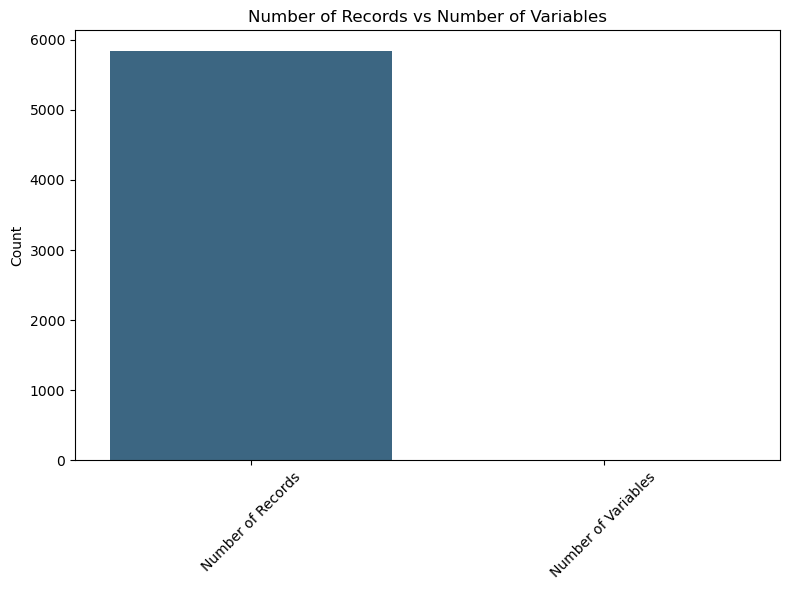

Saved plot: images/stroke_records_variables.png
No missing values found in the dataset.

Variable Types:
{'numeric': [], 'binary': [], 'date': [], 'symbolic': ['Date;Bronx;Brooklyn;Queens;StatenIsland;Manhattan']}


/var/folders/b0/slnc__2x31jczblnsfgfmjw00000gn/T/ipykernel_86151/882881610.py:112: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[c] = to_datetime(df[c], errors="raise")


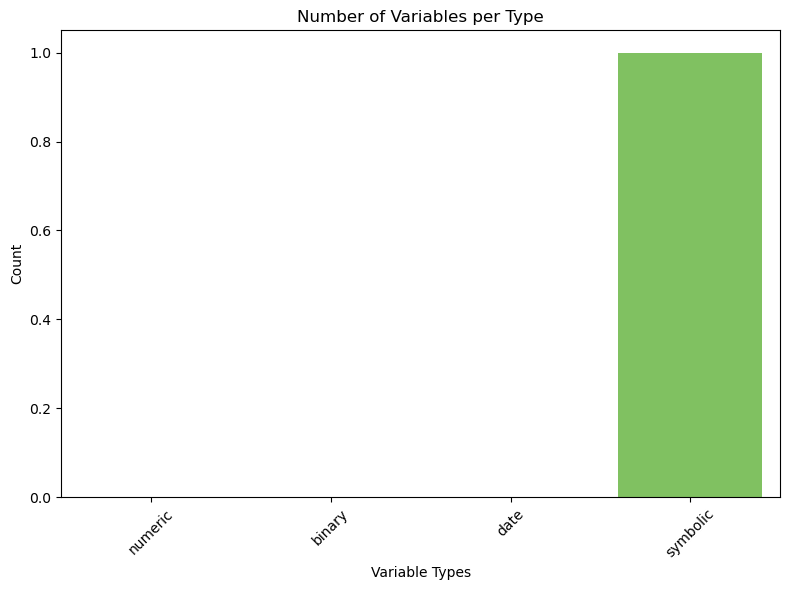

Saved plot: images/stroke_variable_types.png

Converted Symbolic Variables to 'category' dtype:
Date;Bronx;Brooklyn;Queens;StatenIsland;Manhattan    category
dtype: object

Updated Data Types:
Date;Bronx;Brooklyn;Queens;StatenIsland;Manhattan    category
dtype: object

Summary:
- Total Records: 5844
- Total Variables: 1
- Missing Values per Variable: None
- Variable Types: {'numeric': 0, 'binary': 0, 'date': 0, 'symbolic': 1}

––––––––––––––––––––––––––––––––––––––––––



In [3]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import DataFrame, Series, read_csv, to_numeric, to_datetime
from matplotlib.pyplot import figure, savefig, show

# Ensure that the 'images' directory exists
images_dir = "images"
os.makedirs(images_dir, exist_ok=True)



def analyze_dataset(data: DataFrame, file_tag: str, images_dir: str) -> None:
    # Display the shape of the dataset
    print("Dataset Shape:", data.shape)  # Expected Output: (5110, 11)

    # ---------------------------
    # 1. Number of Records vs Variables
    # ---------------------------

    def plot_bar_chart(x_labels, y_values, title="", xlabel="", ylabel="", rotation=45):
        """
        Utility function to plot a bar chart.
        """
        plt.figure(figsize=(8, 6))
        sns.barplot(x=x_labels, y=y_values, hue=x_labels, palette="viridis", legend=False)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.xticks(rotation=rotation)
        plt.tight_layout()

    # Prepare data for the bar chart
    values: dict[str, int] = {
        "Number of Records": data.shape[0],
        "Number of Variables": data.shape[1]
    }

    # Plot and save the bar chart
    plot_bar_chart(
        list(values.keys()),
        list(values.values()),
        title="Number of Records vs Number of Variables",
        xlabel="",
        ylabel="Count"
    )
    # savefig(os.path.join(images_dir, f"{file_tag}_records_variables.png"))
    show()
    print("Saved plot: images/stroke_records_variables.png")

    # ---------------------------
    # 2. Missing Values per Variable
    # ---------------------------

    # Calculate missing values per variable
    mv: dict[str, int] = {}
    for var in data.columns:
        nr: int = data[var].isna().sum()
        if nr > 0:
            mv[var] = nr

    # Plot and save the missing values bar chart
    if mv:
        plot_bar_chart(
            list(mv.keys()),
            list(mv.values()),
            title="Number of Missing Values per Variable",
            xlabel="Variables",
            ylabel="Number of Missing Values",
            rotation=90
        )
        savefig(os.path.join(images_dir, f"{file_tag}_mv.png"))
        show()
        print("Saved plot: images/stroke_mv.png")
    else:
        print("No missing values found in the dataset.")

    # ---------------------------
    # 3. Determine Variable Types
    # ---------------------------

    def get_variable_types(df: DataFrame) -> dict[str, list]:
        """
        Categorize variables into numeric, binary, date, and symbolic types.
        
        Parameters:
        - df: pandas DataFrame to analyze.
        
        Returns:
        - Dictionary with keys 'numeric', 'binary', 'date', 'symbolic' and lists of column names as values.
        """
        variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

        nr_values: Series = df.nunique(axis=0, dropna=True)
        for c in df.columns:
            if nr_values[c] == 2:
                variable_types["binary"].append(c)
                try:
                    df[c] = df[c].astype("bool")
                except ValueError:
                    # If conversion to bool fails, keep it as is
                    print(f"Warning: Could not convert '{c}' to bool.")
            else:
                try:
                    to_numeric(df[c], errors="raise")
                    variable_types["numeric"].append(c)
                except ValueError:
                    try:
                        df[c] = to_datetime(df[c], errors="raise")
                        variable_types["date"].append(c)
                    except ValueError:
                        variable_types["symbolic"].append(c)

        return variable_types

    # Get variable types
    variable_types: dict[str, list] = get_variable_types(data)
    print("\nVariable Types:")
    print(variable_types)

    # Count the number of variables per type
    counts: dict[str, int] = {tp: len(cols) for tp, cols in variable_types.items()}

    # Plot and save the variable types bar chart
    plot_bar_chart(
        list(counts.keys()),
        list(counts.values()),
        title="Number of Variables per Type",
        xlabel="Variable Types",
        ylabel="Count"
    )
    savefig(os.path.join(images_dir, f"{file_tag}_variable_types.png"))
    show()
    print("Saved plot: images/stroke_variable_types.png")

    # ---------------------------
    # 4. Convert Symbolic Variables to Categorical
    # ---------------------------

    symbolic: list[str] = variable_types.get("symbolic", [])
    if symbolic:
        data[symbolic] = data[symbolic].apply(lambda x: x.astype("category"))
        print("\nConverted Symbolic Variables to 'category' dtype:")
        print(data[symbolic].dtypes)
    else:
        print("\nNo symbolic variables to convert.")

    # ---------------------------
    # 5. Display Updated Data Types
    # ---------------------------

    print("\nUpdated Data Types:")
    print(data.dtypes)

    # ---------------------------
    # 6. Summary
    # ---------------------------

    print("\nSummary:")
    print(f"- Total Records: {data.shape[0]}")
    print(f"- Total Variables: {data.shape[1]}")
    print(f"- Missing Values per Variable: {mv if mv else 'None'}")
    print(f"- Variable Types: {counts}")
    # done
    print("\n––––––––––––––––––––––––––––––––––––––––––\n")

# for each forcast
for file in forcasting_datasets:
    file_path = Path(path) / file
    if file_path.exists():
        data = pd.read_csv(file_path)
        analyze_dataset(data, file.split('.')[0], images_dir)
    else:
        print(f"File {file_path} not found.")
        raise SystemExit()